# Phishing Detection Using Neural Networks - Results

## Katherine Haynes <br> Fall, 2020


# 1 Setup

### Define Test Locations and Labels

In [2]:
# ANN Mixed Feature Results
dirANN = '/Users/kdhaynes/Dropbox/classes/cs533/project/annFeat/'
fileANN = ['saveNN/TestResults40_TOTOA.pkl',
           'saveNN/TestResults40_TOSTO.pkl',
           'saveSynNN/TestResults40_TOTO.pkl',
           'saveSynNN/TestResults40_TOSTO.pkl']
labelANN = ['ANNF TOTO', 'ANNF TOSTO', 'ANNS TOTO', 'ANNS TOSTO']

In [3]:
# ANN URL Feature Results
dirANNU = '/Users/kdhaynes/Dropbox/classes/cs533/project/bertANN/saveCombo/'
fileANNU = 'TestResults1.pkl'
labelANNU = 'ANNU'

In [4]:
# BERT Pre-Trained Results
dirBert = '/Users/kdhaynes/Dropbox/classes/cs533/project/bertURL/saveBERT/'
fileBert = ['BBase1_Predicted_Test.pkl',
            'BBaseC0_Predicted_Test.pkl',
            'BLarge2c_Predicted_Test.pkl']
timeBert = [319, 491, 1867]
labelB = ['BERT-Base', 'BERT-BaseC','BERT-Large']

In [5]:
# BERT URL-Trained Results
dirBertURL = '/Users/kdhaynes/Dropbox/classes/cs533/project/bertURL/saveURL/'
fileBertURL = 'BERTURL_Predicted_Test.pkl'
labelBURL = 'BERT-URL'

In [6]:
# BERT-ANN Results
dirBertANN = '/Users/kdhaynes/Dropbox/classes/cs533/project/bertANN/saveCombo/'
fileBertANN = 'TestResults10_Combo.pkl'
labelBANN = 'BERT-ANN'

In [7]:
# ELECTRA Pre-Trained Results
dirElectra = '/Users/kdhaynes/Dropbox/classes/cs533/project/electraURL/saveElectra/'
fileElectra = ['ESmall1c_Predicted_Test.pkl',
               'EBase1b_Predicted_Test.pkl',
               'ELarge2_Predicted_Test.pkl']
timeElectra = [357, 489, 859]
labelE = ['ELECTRA-Small','ELECTRA-Base','ELECTRA-Large']

### Load Libraries

In [8]:
# Load Libraries
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import auc, confusion_matrix

In [9]:
# Set Plotting Sizes
TINY_SIZE = 12
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
HUGE_SIZE = 28

plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=TINY_SIZE)    # legend fontsize

In [10]:
# Set Plotting Colors
myColors = ['darkblue','slateblue','darkviolet','fuchsia','crimson',
            'orangered','goldenrod','darkolivegreen','darkslategrey']
myColorsCB=['slategray','cornflowerblue','royalblue','midnightblue',
            'slateblue','mediumslateblue','rebeccapurple','blueviolet',
            'mediumorchid','plum','fuchsia','orchid','hotpink']

mpl.rcParams['figure.figsize'] = (12, 10)
AllColors = ['#004C99','#0066CC','#0080FF','#3399FF',
             '#4C0099','#6600CC','#7F00FF','#9933FF',
             '#660066','#990099','#CC00CC','#FF00FF']
AllColorsSamePurple = ['#004C99','#004C99','#004C99','#004C99',
                 '#4C0099','#4C0099','#4C0099','#4C0099',
                 '#660066','#660066','#660066','#660066']
AllColorsSame2 = ['#377eb8','#377eb8','#377eb8','#377eb8',
                 '#e41a1c','#e41a1c','#e41a1c','#e41a1c',
                 '#4daf4a','#4daf4a','#4daf4a','#4daf4a']
aCol='tab:blue'
bCol='tab:red'
cCol='tab:orange'
dCol='tab:green'
AllColorsSame = [aCol,aCol,aCol,aCol,
                 bCol,bCol,bCol,bCol,
                 cCol,cCol,cCol,cCol,
                 dCol,dCol,dCol,dCol]

colorTOTO = 'tab:blue'
colorTOTS = 'tab:red'
colorTOSTO = 'tab:orange'
colorTOSTS = 'tab:green'
colorTOSTOS = 'tab:purple'

### Plotting Routines

In [11]:
# PLOT CONFUSION MATRIX
def plot_confusion_matrix(cm, class_names, cTitle='Confusion Matrix'):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    NOTE: Modified from output of scikit learn!  
    EXPECTS: [[tp, fp],[fn,tn]]
    
    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
  
    figure = plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(cTitle, fontsize=HUGE_SIZE)
    #plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, fontsize=BIGGER_SIZE)
    plt.yticks(tick_marks, class_names, fontsize=BIGGER_SIZE)

    #Normalize the confusion matrix.
    #cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    colm = np.array([["white","black"],["black","white"]])
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, int(cm[i, j]), horizontalalignment="center", 
                 color=colm[i,j], fontsize=HUGE_SIZE)

    plt.tight_layout()
    plt.ylabel('Predicted',fontsize=BIGGER_SIZE)
    plt.xlabel('Truth',fontsize=BIGGER_SIZE)
  
    return figure

# 2 Load Test Output

### Open ANN Mixed Features Results

In [12]:
readANN = True
plotOTOTO = False
saveOTOTO = True

plotOTOSTO = False
saveOTOSTO = True

plotSTOTO = False
saveSTOTO = True

plotSTOSTO = False
saveSTOSTO = True

In [13]:
# Open and Read ANN Predictions
if readANN:
    tnANN = []
    tpANN = []
    fnANN = []
    fpANN = []
    accANN = []
    aucANN = []
    f1ANN = []
    recallANN = []
    precisionANN = []
    
    for file in fileANN:
        aFile = dirANN + file
        with open(aFile, 'rb') as handle:
            allTemp = pickle.load(handle)
            
        bestacc = 0.
        nTries = len(allTemp)
        for i in range(nTries):
            results = allTemp[i][0]
            if results['accuracy'] > bestacc:
                tn = results['tn']
                tp = results['tp']
                fn = results['fn']
                fp = results['fp']
                acc = results['balAcc']
                auc = results['auc']
                f1 = results['f1Score']
                recall = results['recall']
                precision = results['precision']
                bestacc = results['balAcc']
                
        tnANN.append(tn)
        tpANN.append(tp)
        fnANN.append(fn)
        fpANN.append(fp)
        accANN.append(acc)
        aucANN.append(auc)
        f1ANN.append(f1)
        recallANN.append(recall)
        precisionANN.append(precision)
       
    bestANNRef = np.argmax(accANN)
    print("Loaded ANNF and ANNS Results, Top Accuracy: {:.2f}%".format(max(accANN)*100.))

Loaded ANNF and ANNS Results, Top Accuracy: 97.41%


In [14]:
# Plot Confusion Matrices
if readANN:
    if plotOTOTO:
        cmatrix = np.array([[tpANN[0], fpANN[0]],
                        [fnANN[0], tnANN[0]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle=labelANN[0])
        
        if saveOTOTO:
            file = './figs/ANNOO_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)
            
    if plotOTOSTO:
        cmatrix = np.array([[tpANN[1], fpANN[1]],
                        [fnANN[1], tnANN[1]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle=labelANN[1] + ' Confusion Matrix')
        
        if saveOTOSTO:
            file = './figs/ANNOS_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)
            
    if plotSTOTO:
        cmatrix = np.array([[tpANN[2], fpANN[2]],
                        [fnANN[2], tnANN[2]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle=labelANN[2] + ' Confusion Matrix')
        
        if saveSTOTO:
            file = './figs/ANNSO_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)
            
    if plotSTOSTO:
        cmatrix = np.array([[tpANN[3], fpANN[3]],
                        [fnANN[3], tnANN[3]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle=labelANN[3] + ' Confusion Matrix')
        
        if saveSTOSTO:
            file = './figs/ANNSS_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)

### Open ANN URL Features Results

In [15]:
readANNU = True
plotANNU = False
saveANNU = True

In [16]:
# Open and Read ANN URL Predictions
if readANNU:
    aFile = dirANNU + fileANNU
    with open(aFile, 'rb') as handle:
        allTemp = pickle.load(handle)
    
    results = allTemp[-1][0]
    tnANNU = [results['tn']]
    tpANNU = [results['tp']]
    fnANNU = [results['fn']]
    fpANNU = [results['fp']]
    accANNU = [results['balAcc']]
    aucANNU = [results['auc']]
    f1ANNU = [results['f1Score']]
    recallANNU = [results['recall']]
    precisionANNU = [results['precision']]
    
    print("Loaded ANNU Results, Top Accuracy: {:.2f}%".format(max(accANNU)*100.))

Loaded ANNU Results, Top Accuracy: 86.17%


In [17]:
# Plot Confusion Matrix
if readANNU and plotANNU:
    cmatrix = np.array([[tpANNU[0], fpANNU[0]],
                        [fnANNU[0], tnANNU[0]]])
    disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='ANNU Confusion Matrix')
        
    if saveBertANN:
        file = './figs/ANNU_Conf.png'
        print('Saving Figure: {}'.format(file))
        disp.savefig(file,bbox_inches='tight',dpi=200)

### Open BERT URL Vocabulary Results

In [18]:
readBertURL = True
plotBertURL = True
saveBertURL = False

In [19]:
if readBertURL:
    bFile = dirBertURL + fileBertURL
    with open(bFile, 'rb') as handle:
        allTemp = pickle.load(handle)
        
    tePreds = np.rint(allTemp[0]).astype(int)
    teY = allTemp[1]
    
    tn, fp, fn, tp = confusion_matrix(teY, tePreds).ravel()
    #Adjust the values to compare to other BERT models
    totOther = 3039
    totHere = 12156
    tn = int(tn/totHere*totOther)
    fp = int(fp/totHere*totOther)
    accuracy = (tp + tn)/(tn + tp + fn + fp)
    accuracyB = ((tp/(tp+fn) + tn/(fp+tn))*0.5)
    f1 = tp / (tp + 0.5*(fp + fn))
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
        
    tnBURL = [tn]
    tpBURL = [tp]
    fnBURL = [fn]
    fpBURL = [fp]
    accBURL = [accuracy]
    f1BURL = [f1]
    recallBURL = [recall]
    precisionBURL = [precision]
    
    print("Loaded BERT URL-Trained Results, Top Accuracy: {:.2f}%".format(max(accBURL)*100.))

Loaded BERT URL-Trained Results, Top Accuracy: 94.92%


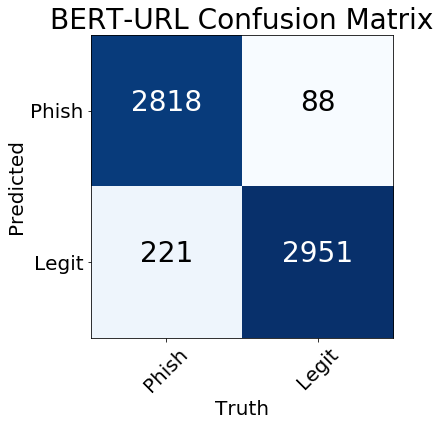

In [20]:
# Plot Confusion Matrix
if readBertURL and plotBertURL:
    cmatrix = np.array([[tpBURL[0], fpBURL[0]],
                        [fnBURL[0], tnBURL[0]]])
    disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='BERT-URL Confusion Matrix')
        
    if saveBertURL:
        file = './figs/BURL_Conf.png'
        print('Saving Figure: {}'.format(file))
        disp.savefig(file,bbox_inches='tight',dpi=200)

### Open BERT-ANN Results

In [21]:
readBertANN = True
plotBertANN = True
saveBertANN = False

In [22]:
# Open and Read BERT-ANN Predictions
if readBertANN:
    bFile = dirBertANN + fileBertANN
    with open(bFile, 'rb') as handle:
        allTemp = pickle.load(handle)
    acc = allTemp[0]
    CV = allTemp[1]
    preds = allTemp[2]
    params = allTemp[3]
    results = allTemp[4]
    
    nTests = len(results)
    
    tnBANN = []
    tpBANN = []
    fnBANN = []
    fpBANN = []
    accBANN = []
    f1BANN = []
    recallBANN = []
    precisionBANN = []
    for i in range(nTests):
        rNow = results[i]
        tpBANN.append(rNow['tp'])
        fnBANN.append(rNow['fn'])
        #tnBANN.append(rNow['tn'])
        #fpBANN.append(rNow['fp'])
        #accBANN.append(rNow['balAcc'])
        #f1BANN.append(rNow['f1Score'])
        #recallBANN.append(rNow['recall'])
        #precisionBANN.append(rNow['precision'])
        
        # Scale values to compare with other BERT models
        totOther = 3039
        totHere = 12156
        tp = rNow['tp']
        fn = rNow['fn']
        tn = rNow['tn']
        fp = rNow['fp']
        tn = np.rint(tn/totHere*totOther)
        fp = np.rint(fp/totHere*totOther)
        tnBANN.append(tn)
        fpBANN.append(fp)
        
        accBANN.append((tp + tn)/(tn + tp + fn + fp))
        f1BANN.append(tp / (tp + 0.5*(fp + fn)))
        recallBANN.append(tp/(tp+fn))
        precisionBANN.append(tp/(tp+fp))

    bestBANNRef = np.argmax(accBANN)
    print("Loaded BERT-ANN Results, Top Accuracy: {:.2f}%".format(max(accBANN)*100.))

Loaded BERT-ANN Results, Top Accuracy: 95.57%


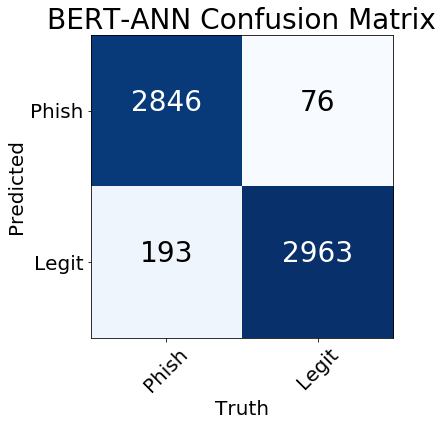

In [23]:
# Plot Confusion Matrix
if readBertANN and plotBertANN:
    cmatrix = np.array([[tpBANN[bestBANNRef], fpBANN[bestBANNRef]],
                        [fnBANN[bestBANNRef], tnBANN[bestBANNRef]]])
    disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='BERT-ANN Confusion Matrix')
        
    if saveBertANN:
        file = './figs/BANN_Conf.png'
        print('Saving Figure: {}'.format(file))
        disp.savefig(file,bbox_inches='tight',dpi=200)

### Open BERT Pre-Trained Results

In [24]:
readBert = True
plotBertBase = True
saveBertBase = False
plotBertBaseC = True
saveBertBaseC = False
plotBertLarge = True
saveBertLarge = False

In [25]:
# Open and Read BERT Predictions
if readBert:
    tnB = []
    tpB = []
    fnB = []
    fpB = []
    accB = []
    f1B = []
    recallB = []
    precisionB = []
    
    for file in fileBert:
        bFile = dirBert + file
        with open(bFile, 'rb') as handle:
            allTemp = pickle.load(handle)
    
        tePreds = allTemp[0]
        teY = allTemp[2]
    
        tn, fp, fn, tp = confusion_matrix(teY, tePreds).ravel()
        accuracy = (tp + tn)/(tn + tp + fn + fp)
        accuracyB = ((tp/(tp+fn) + tn/(fp+tn))*0.5)
        f1 = tp / (tp + 0.5*(fp + fn))
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        
        tnB.append(tn)
        tpB.append(tp)
        fnB.append(fn)
        fpB.append(fp)
        accB.append(accuracy)
        f1B.append(f1)
        recallB.append(recall)
        precisionB.append(precision)
        
    bestBRef = np.argmax(accB)
    print("Loaded BERT Pre-Trained Results, Top Accuracy: {:.2f}%".format(max(accB)*100.))

Loaded BERT Pre-Trained Results, Top Accuracy: 96.10%


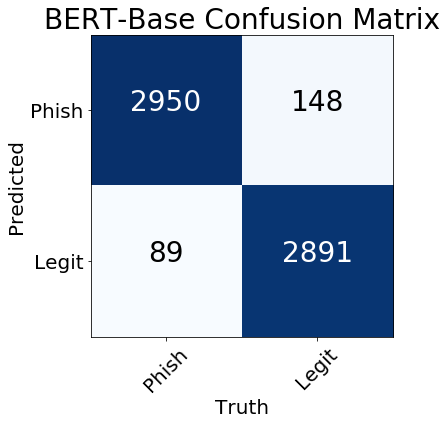

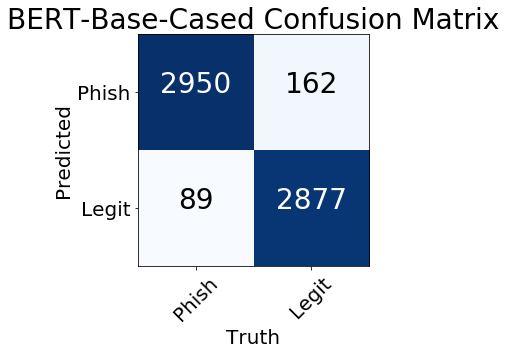

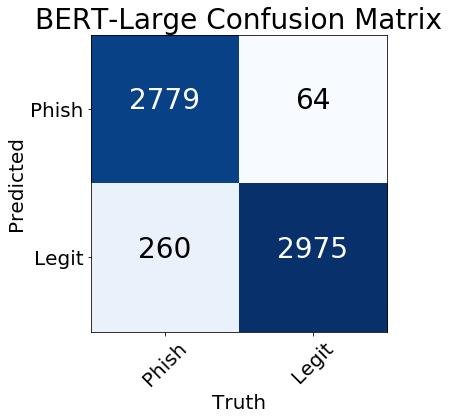

In [26]:
# Plot Confusion Matrices
if readBert:
    if plotBertBase:
        cmatrix = np.array([[tpB[0], fpB[0]],
                        [fnB[0], tnB[0]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='BERT-Base Confusion Matrix')
        
        if saveBertBase:
            file = './figs/BBase_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)
            
    if plotBertBaseC:
        cmatrix = np.array([[tpB[1], fpB[1]],
                        [fnB[1], tnB[1]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='BERT-Base-Cased Confusion Matrix')
        
        if saveBertBaseC:
            file = './figs/BBaseC_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)
            
    if plotBertLarge:
        cmatrix = np.array([[tpB[2], fpB[2]],
                        [fnB[2], tnB[2]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='BERT-Large Confusion Matrix')
        
        if saveBertLarge:
            file = './figs/BLarge_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)

### Open and Read ELECTRA Pre-Trained Results

In [27]:
readElectra = True
plotElectraSmall = True
saveElectraSmall = False
plotElectraBase = True
saveElectraBase = False
plotElectraLarge = True
saveElectraLarge = False

In [28]:
# Open and Read Predictions
if readElectra:
    tnE = []
    tpE = []
    fnE = []
    fpE = []
    accE = []
    f1E = []
    recallE = []
    precisionE = []
    
    for file in fileElectra:
        eFile = dirElectra + file
        with open(eFile, 'rb') as handle:
            allTemp = pickle.load(handle)
    
        tePreds = allTemp[0]
        teY = allTemp[2]
    
        tn, fp, fn, tp = confusion_matrix(teY, tePreds).ravel()
        accuracy = (tp + tn)/(tn + tp + fn + fp)
        accuracyB = ((tp/(tp+fn) + tn/(fp+tn))*0.5)
        f1 = tp / (tp + 0.5*(fp + fn))
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        
        tnE.append(tn)
        tpE.append(tp)
        fnE.append(fn)
        fpE.append(fp)
        accE.append(accuracy)
        f1E.append(f1)
        recallE.append(recall)
        precisionE.append(precision)
        
    bestERef = np.argmax(accE)
    print("Loaded ELECTRA Results, Top Accuracy: {:.2f}%".format(max(accE)*100.))

Loaded ELECTRA Results, Top Accuracy: 96.33%


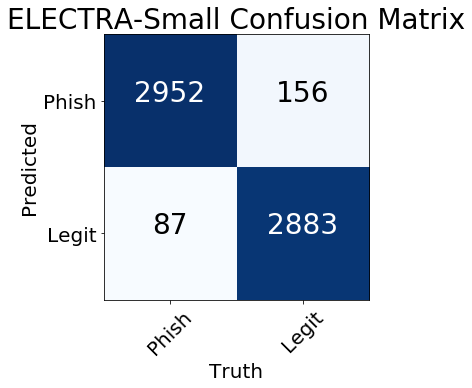

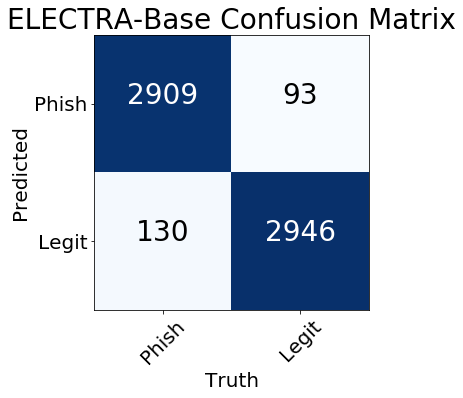

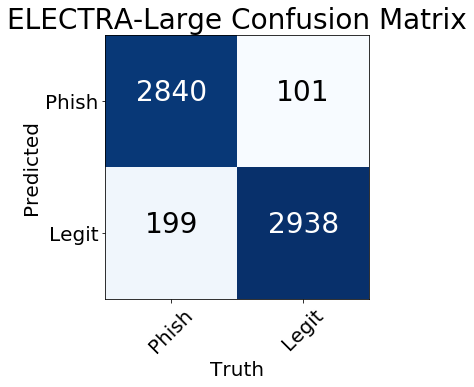

In [29]:
# Plot Confusion Matrices
if readElectra:
    if plotElectraSmall:
        cmatrix = np.array([[tpE[0], fpE[0]],
                        [fnE[0], tnE[0]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='ELECTRA-Small Confusion Matrix')
        
        if saveElectraSmall:
            file = './figs/ESmall_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)
            
    if plotElectraBase:
        cmatrix = np.array([[tpE[1], fpE[1]],
                        [fnE[1], tnE[1]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='ELECTRA-Base Confusion Matrix')
        
        if saveElectraBase:
            file = './figs/EBase_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)
            
    if plotElectraLarge:
        cmatrix = np.array([[tpE[2], fpE[2]],
                        [fnE[2], tnE[2]]])
        disp = plot_confusion_matrix(cmatrix, ['Phish','Legit'],
                                 cTitle='ELECTRA-Large Confusion Matrix')
        
        if saveElectraLarge:
            file = './figs/ELarge_Conf.png'
            print('Saving Figure: {}'.format(file))
            disp.savefig(file,bbox_inches='tight',dpi=200)

# 3 Plot Results

### BERT Scores

In [35]:
plotBERT = True
saveBERT = False
fileBERT = './figs/scores_bert.png'

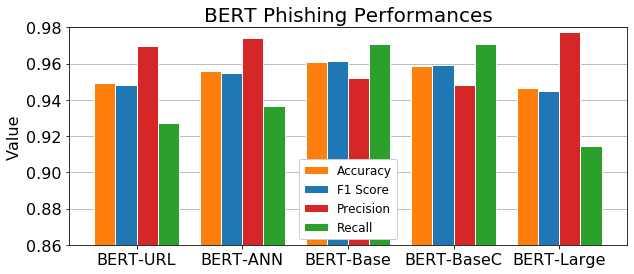

In [36]:
# Bar graph of BERT scores
if plotBERT:
    barWidth = 0.2
    allLabels = [labelBURL, labelBANN, labelB[0], labelB[1], labelB[2]]

    bars1 = [accBURL[0], accBANN[0], accB[0], accB[1], accB[2]]
    bars2 = [f1BURL[0], f1BANN[0], f1B[0], f1B[1], f1B[2]]
    bars3 = [precisionBURL[0], precisionBANN[0], precisionB[0], 
             precisionB[1], precisionB[2]]
    bars4 = [recallBURL[0], recallBANN[0], recallB[0], recallB[1], recallB[2]]
             
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    plt.figure(figsize=(10,4))
    ax = plt.axes()        
    ax.yaxis.grid(zorder=0) # horizontal lines

    myCapSize=14
    plt.bar(r1, bars1,
            color=AllColorsSame[8:12], width=barWidth, edgecolor='white',
            label='Accuracy', zorder=2)
    plt.bar(r2, bars2, 
            color=AllColorsSame[0:4], width=barWidth, edgecolor='white',
            label='F1 Score', zorder=2)
    plt.bar(r3, bars3, 
            color=AllColorsSame[4:8], width=barWidth, edgecolor='white',
            label='Precision', zorder=2)
    plt.bar(r4, bars4, 
            color=AllColorsSame[12:16], width=barWidth, edgecolor='white',
            label='Recall', zorder=2)
    
    plt.ylabel('Value')
    plt.ylim([0.86,0.98])
    plt.title('BERT Phishing Performances')
    plt.xticks([r+1.5*barWidth for r in range(len(bars1))], allLabels)
    plt.legend(fancybox=True, framealpha=1.0, loc='lower center')

    if saveBERT:
        plt.savefig(fileBERT,bbox_inches='tight',dpi=200)
    else:
        plt.show()

### ELECTRA Scores

In [37]:
plotELECTRA = True
saveELECTRA = False
fileELECTRA = './figs/scores_electra.png'

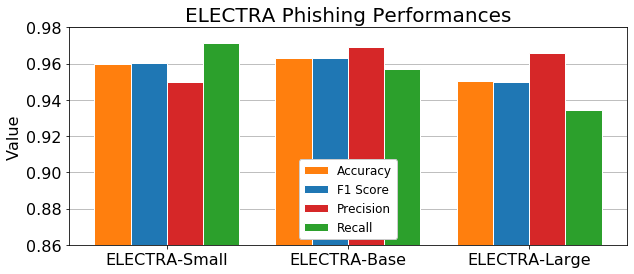

In [38]:
# Bar graph of ELECTRA scores
if plotELECTRA:
    barWidth = 0.2
    allLabels = [labelE[0], labelE[1], labelE[2]]

    bars1 = [accE[0], accE[1], accE[2]]
    bars2 = [f1E[0], f1E[1], f1E[2]]
    bars3 = [precisionE[0], precisionE[1], precisionE[2]]
    bars4 = [recallE[0], recallE[1], recallE[2]]
             
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    plt.figure(figsize=(10,4))
    ax = plt.axes()        
    ax.yaxis.grid(zorder=0) # horizontal lines

    myCapSize=14
    plt.bar(r1, bars1,
            color=AllColorsSame[8:12], width=barWidth, edgecolor='white',
            label='Accuracy', zorder=2)
    plt.bar(r2, bars2, 
            color=AllColorsSame[0:4], width=barWidth, edgecolor='white',
            label='F1 Score', zorder=2)
    plt.bar(r3, bars3, 
            color=AllColorsSame[4:8], width=barWidth, edgecolor='white',
            label='Precision', zorder=2)
    plt.bar(r4, bars4, 
            color=AllColorsSame[12:16], width=barWidth, edgecolor='white',
            label='Recall', zorder=2)
    
    plt.ylabel('Value')
    plt.ylim([0.86,0.98])
    plt.title('ELECTRA Phishing Performances')
    plt.xticks([r+1.5*barWidth for r in range(len(bars1))], allLabels)
    plt.legend(fancybox=True, framealpha=1.0, loc='lower center')

    if saveELECTRA:
        plt.savefig(fileELECTRA,bbox_inches='tight',dpi=200)
    else:
        plt.show()

### BERT and ELECTRA

In [39]:
plotBandE = True
saveBandE = True
fileBandE = './scores_BandE.png'

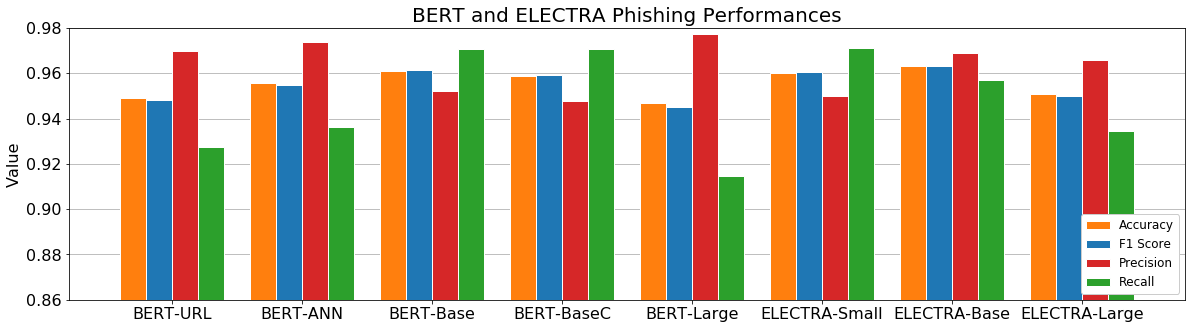

In [48]:
# Bar graph of BERT scores
if plotBandE:
    barWidth = 0.2
    allLabels = [labelBURL, labelBANN, labelB[0], labelB[1], labelB[2],
#                 'E-Small', 'E-Base', 'E-Large']
                 labelE[0], labelE[1], labelE[2]]

    bars1 = [accBURL[0], accBANN[0], accB[0], accB[1], accB[2], accE[0], accE[1], accE[2]]
    bars2 = [f1BURL[0], f1BANN[0], f1B[0], f1B[1], f1B[2], f1E[0], f1E[1], f1E[2]]
    bars3 = [precisionBURL[0], precisionBANN[0], precisionB[0], 
             precisionB[1], precisionB[2],
             precisionE[0], precisionE[1], precisionE[2]]
    bars4 = [recallBURL[0], recallBANN[0], recallB[0], recallB[1], recallB[2],
             recallE[0], recallE[1], recallE[2]]
             
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    plt.figure(figsize=(20,5))
    ax = plt.axes()        
    ax.yaxis.grid(zorder=0) # horizontal lines

    myCapSize=14
    plt.bar(r1, bars1,
            color=AllColorsSame[8:12], width=barWidth, edgecolor='white',
            label='Accuracy', zorder=2)
    plt.bar(r2, bars2, 
            color=AllColorsSame[0:4], width=barWidth, edgecolor='white',
            label='F1 Score', zorder=2)
    plt.bar(r3, bars3, 
            color=AllColorsSame[4:8], width=barWidth, edgecolor='white',
            label='Precision', zorder=2)
    plt.bar(r4, bars4, 
            color=AllColorsSame[12:16], width=barWidth, edgecolor='white',
            label='Recall', zorder=2)
    
    plt.ylabel('Value')
    plt.ylim([0.86,0.98])
    plt.title('BERT and ELECTRA Phishing Performances')
    plt.xticks([r+1.5*barWidth for r in range(len(bars1))], allLabels)
    plt.legend(fancybox=True, framealpha=1.0, loc='lower right')

    if saveBandE:
        plt.savefig(fileBandE,bbox_inches='tight',dpi=200)
    else:
        plt.show()

### All Top Scores

In [33]:
plotScores = True
saveScores = True
fileScores = './figs/scores_all_best.png'

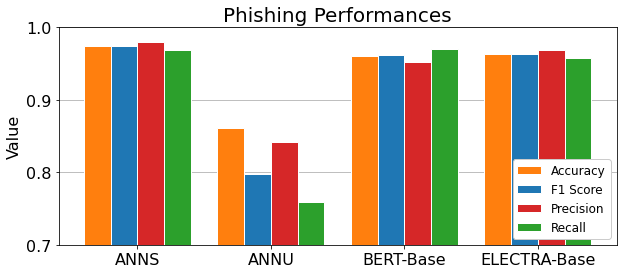

In [39]:
# Bar graph of best scores
if plotScores:
    barWidth = 0.2
    allLabels = ['ANNS', labelANNU,
                 #labelBURL, labelBANN, 
                 labelB[bestBRef], labelE[bestERef]]

    bars1 = [accANN[bestANNRef], accANNU[0], 
             #accBURL[0],accBANN[bestBANNRef], 
             accB[bestBRef], accE[bestERef]]
    
    bars2 = [f1ANN[bestANNRef], f1ANNU[0],
             #f1BURL[0], f1BANN[bestBANNRef], 
             f1B[bestBRef], f1E[bestERef]]
    
    bars3 = [precisionANN[bestANNRef], precisionANNU[0],
             #precisionBURL[0], precisionBANN[bestBANNRef], 
             precisionB[bestBRef], precisionE[bestERef]]

    bars4 = [recallANN[bestANNRef], recallANNU[0],
             #recallBURL[0], recallBANN[bestBANNRef], 
             recallB[bestBRef], recallE[bestERef]]
             
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    plt.figure(figsize=(10,4))
    ax = plt.axes()        
    ax.yaxis.grid(zorder=0) # horizontal lines

    myCapSize=6
    plt.bar(r1, bars1, capsize=myCapSize,
            color=AllColorsSame[8:12], width=barWidth, edgecolor='white',
            label='Accuracy', zorder=2)
    plt.bar(r2, bars2, capsize=myCapSize,
            color=AllColorsSame[0:4], width=barWidth, edgecolor='white', 
            label='F1 Score', zorder=2)
    plt.bar(r3, bars3, capsize=myCapSize,
            color=AllColorsSame[4:8], width=barWidth, edgecolor='white', 
            label='Precision', zorder=2)
    plt.bar(r4, bars4, capsize=myCapSize,
            color=AllColorsSame[12:16], width=barWidth, edgecolor='white', 
            label='Recall', zorder=2)
    
    plt.ylabel('Value')
    plt.ylim([0.7,1.0])
    plt.title('Phishing Performances')
    plt.xticks([r+1.5*barWidth for r in range(len(bars1))], allLabels)
    plt.legend(fancybox=True, framealpha=1.0, loc='lower right')

    if saveScores:
        plt.savefig(fileScores,bbox_inches='tight',dpi=200)
    else:
        plt.show()

### Literature Comparison

In [35]:
plotComp = True
saveComp = True
fileComp = './figs/scores_comp.png'

In [64]:
# Saved values from literature
if plotComp:
    ACNN = [0.978, -999, 0.987, 0.972]      #Zhang18
    ANN = [accANN[bestANNRef], f1ANN[bestANNRef], 
            precisionANN[bestANNRef], recallANN[bestANNRef]]
    ARTMAP = [0.936, -999, -999, 0.928]     #Saravanan20
    BERT = [accB[bestBRef], f1B[bestBRef], 
            precisionB[bestBRef], recallB[bestBRef]]
    DTOFANN = [0.978, 0.964, 0.964, 0.964] #Zhu20
    ELECTRA = [accE[bestERef], f1E[bestERef], 
                precisionE[bestERef], recallE[bestERef]]
    NIOSELM = [0.975, 0.973, 0.978, 0.983]  #Yang21
    OFSNN = [0.993, 0.964, 0.969, 0.959]   #Zhu19
    XGBoost = [0.961, 0.955, 0.965, 0.959]  #Yang21
    
    ELECTRAS = [accE[0], f1E[0], precisionE[0], recallE[0]]
    ELECTRAB = [accE[1], f1E[1], precisionE[1], recallE[1]]
    print('Mean ANN Score: {:.4f} and Top Accuracy: {:.3f}%'.format(
        np.mean(ANN), ANN[0]))
    print('Mean BERT-Base Score: {:.4f} and Top Accuarcy {:.4f}'.format(
        np.mean(BERT), BERT[0]))
    print('Mean ELECTRA-Small Score: {:.4f} and Top Accuracy {:.4f}'.format(
        np.mean(ELECTRAS), ELECTRAS[0]))
    print('Mean ELECTRA-Base Score: {:.4f} and Top Accuracy {:.4f}'.format(
        np.mean(ELECTRAB), ELECTRAB[0]))

Mean ANN Score: 0.9742 and Top Accuracy: 0.974%
Mean BERT-Base Score: 0.9613 and Top Accuarcy 0.9610
Mean ELECTRA-Small Score: 0.9604 and Top Accuracy 0.9600
Mean ELECTRA-Base Score: 0.9632 and Top Accuracy 0.9633


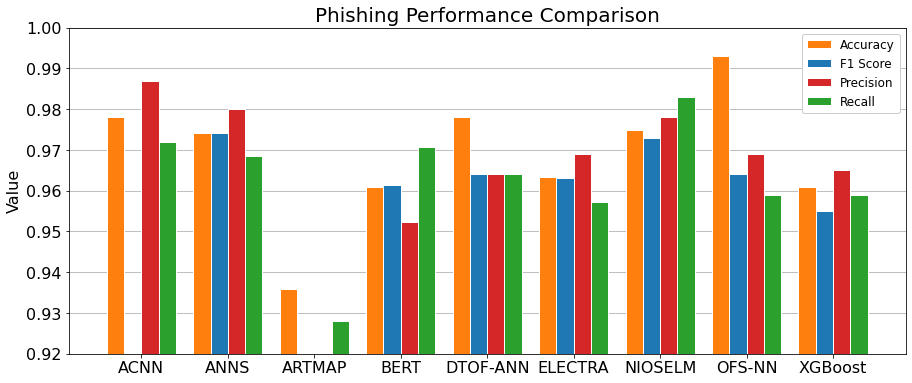

In [37]:
# Bar graph of literature scores
if plotComp:
    barWidth = 0.2
    allLabels = ['ACNN', 'ANNS', 'ARTMAP', 'BERT', 
                 'DTOF-ANN', 'ELECTRA', 'NIOSELM', 
                 'OFS-NN', 'XGBoost']

    bars1 = [ACNN[0], ANN[0], ARTMAP[0], BERT[0],
             DTOFANN[0], ELECTRA[0], NIOSELM[0],
             OFSNN[0], XGBoost[0]]
    
    bars2 = [ACNN[1], ANN[1], ARTMAP[1], BERT[1],
             DTOFANN[1], ELECTRA[1], NIOSELM[1],
             OFSNN[1], XGBoost[1]]
    
    bars3 = [ACNN[2], ANN[2], ARTMAP[2], BERT[2],
             DTOFANN[2], ELECTRA[2], NIOSELM[2],
             OFSNN[2], XGBoost[2]]

    bars4 = [ACNN[3], ANN[3], ARTMAP[3], BERT[3],
             DTOFANN[3], ELECTRA[3], NIOSELM[3],
             OFSNN[3], XGBoost[3]]
             
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    plt.figure(figsize=(15,6))
    ax = plt.axes()        
    ax.yaxis.grid(zorder=0) # horizontal lines

    myCapSize=6
    plt.bar(r1, bars1, capsize=myCapSize,
            color=AllColorsSame[8:12], width=barWidth, edgecolor='white',
            label='Accuracy', zorder=2)
    plt.bar(r2, bars2, capsize=myCapSize,
            color=AllColorsSame[0:4], width=barWidth, edgecolor='white', 
            label='F1 Score', zorder=2)
    plt.bar(r3, bars3, capsize=myCapSize,
            color=AllColorsSame[4:8], width=barWidth, edgecolor='white', 
            label='Precision', zorder=2)
    plt.bar(r4, bars4, capsize=myCapSize,
            color=AllColorsSame[12:16], width=barWidth, edgecolor='white', 
            label='Recall', zorder=2)
    
    plt.ylabel('Value')
    plt.ylim([0.92,1.0])
    plt.title('Phishing Performance Comparison')
    plt.xticks([r+1.5*barWidth for r in range(len(bars1))], allLabels)
    plt.legend(fancybox=True, framealpha=1.0, loc='upper right')

    if saveComp:
        plt.savefig(fileComp,bbox_inches='tight',dpi=200)
    else:
        plt.show()